# predicting the next country that'll discovery new cases of Coronavirus

In [1]:
#pip install squarify

In [2]:
#pip install folium

In [3]:
import pandas as pd                           # Manipulação de dados
import glob                                   # Importação de dados
import re                                     # Expressões regulares
import itertools                              # Ferramenta iteração
import numpy as np                            # Computação científica
import statsmodels.api as sm                  # Modelagem estatística
import seaborn as sns                         # Visualização de dados
import squarify                               # Visualização de treemaps

import matplotlib.pyplot as plt               # Visualização de dados
import matplotlib
plt.style.use('fivethirtyeight') 

import plotly as py                   # Visualização de dados
py.offline.init_notebook_mode(connected=True)   # for offline mode use
import plotly.graph_objs as go
import plotly.tools as tls                    # Ferramentas do plotly
import ipywidgets as widgets

import folium                                 # Visualização de mapas
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster

import warnings                               # Ignorar warnings
warnings.filterwarnings("ignore")

In [4]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (10,7)

In [5]:
covid = pd.read_csv("full_data.csv")

In [6]:
covid.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,NaN,NaN,1,NaN
1,2020-02-26,Afghanistan,0.0,NaN,1,NaN
2,2020-02-27,Afghanistan,0.0,NaN,1,NaN
3,2020-02-28,Afghanistan,0.0,NaN,1,NaN
4,2020-02-29,Afghanistan,0.0,NaN,1,NaN


In [7]:
covid.groupby('location')['total_cases'].count()

location
Afghanistan            22
Albania                 9
Algeria                21
Andorra                15
Antigua and Barbuda     4
                       ..
Uzbekistan              2
Vatican                11
Venezuela               4
Vietnam                54
World                  57
Name: total_cases, Length: 161, dtype: int64

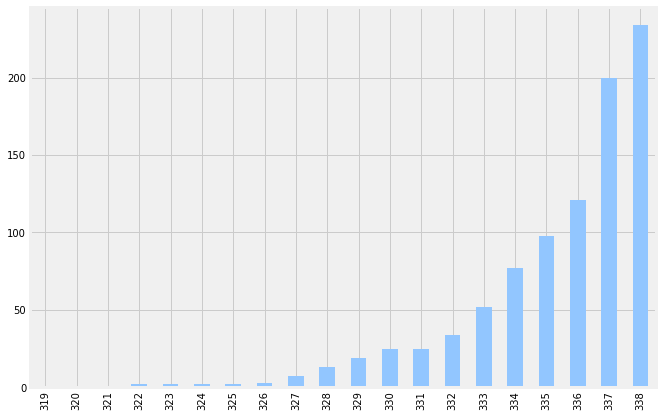

In [8]:
br = covid[covid['location'] == 'Brazil']
covid[covid['location'] == 'Brazil']['total_cases'].plot.bar()

In [9]:
br

,date,location,new_cases,new_deaths,total_cases,total_deaths
319,2020-02-27,Brazil,NaN,NaN,1,NaN
320,2020-02-28,Brazil,0.0,NaN,1,NaN
321,2020-02-29,Brazil,0.0,NaN,1,NaN
322,2020-03-01,Brazil,1.0,NaN,2,NaN
323,2020-03-02,Brazil,0.0,NaN,2,NaN
324,2020-03-03,Brazil,0.0,NaN,2,NaN
325,2020-03-04,Brazil,0.0,NaN,2,NaN
326,2020-03-05,Brazil,1.0,NaN,3,NaN
327,2020-03-06,Brazil,4.0,NaN,7,NaN
328,2020-03-07,Brazil,6.0,NaN,13,NaN


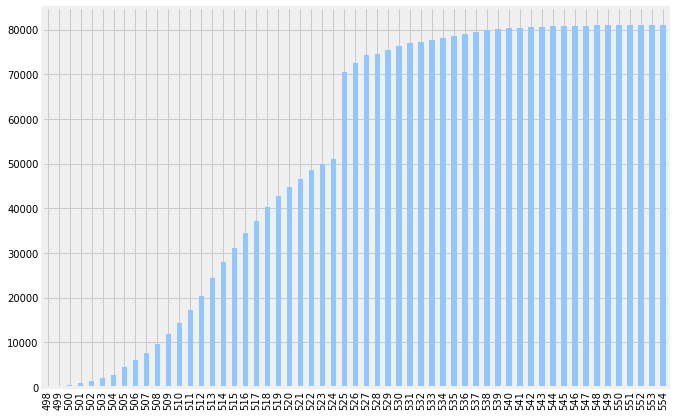

In [10]:
covid[covid['location'] == 'China']['total_cases'].plot.bar()

In [11]:
covid['date'] = pd.to_datetime(covid['date'], format='%Y-%m-%d')

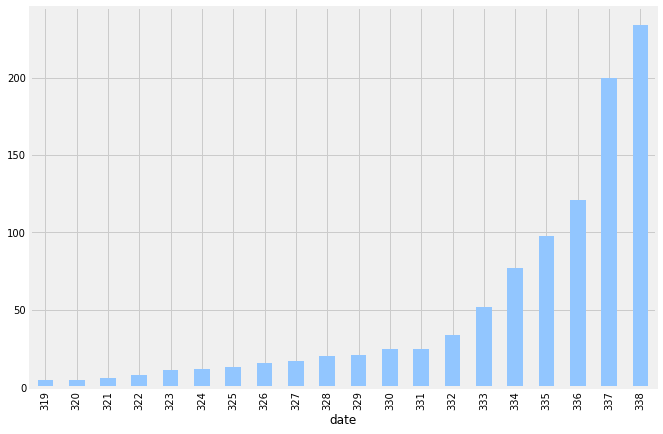

In [12]:
covid.groupby('date')['date'].count().plot.bar()
covid[covid['location'] == 'Brazil']['total_cases'].plot.bar()

### The tan curve represents a scenario in which the U.S. hospital system becomes inundated with coronavirus patients
![risk](https://laistassets.scprdev.org/i/ec32c7efc8c49bac01d79cb9547d4d6e/5e7123bcb555c5000abe3f2e-eight.jpg)

![Number of health care in Brazil](http://www.conass.org.br/consensus/wp-content/upltoads/2014/07/Tabela.png)

### predicting whether a country will exceed the limit

In [13]:
sus = pd.read_csv('sus_1000_hab.csv') # available beds in each city from Brazil 2010

In [14]:
sus = sus.drop(columns=['FID', 'gid', 'Censo','legenda', 'Descrição', 'classe'])

In [15]:
sus.head()

,UF,nome,Pop_est_2009,num_medicos_sus,razao_leitos_sus_1000_hab,geom
0,BAHIA,Tremedal,18433,10,0.2,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,RIO GRANDE DO SUL,Turuçu,4000,7,0.0,MULTIPOLYGON (((-52.035349932081274 -31.567509...
2,ESPIRITO SANTO,Vitória,320156,5,4.1,MULTIPOLYGON (((-40.3292566978242 -20.23997417...
3,MINAS GERAIS,Jacutinga,21424,23,2.9,MULTIPOLYGON (((-46.50528160015326 -22.3400120...
4,PIAUÍ,Nazária,7895,4,0.0,POLYGON ((-42.826685407155495 -5.3480291684437...


In [16]:
sus.describe()

,Pop_est_2009,num_medicos_sus,razao_leitos_sus_1000_hab
count,5.566000e+03,5566.000000,5566.000000
mean,3.440557e+04,50.575278,1.481603
std,2.017854e+05,451.671197,2.122382
min,8.370000e+02,0.000000,0.000000
25%,5.339250e+03,6.000000,0.000000
50%,1.120300e+04,12.000000,1.100000
75%,2.325275e+04,24.000000,2.200000
max,1.103759e+07,22796.000000,72.099998


In [17]:
sus.shape

(5566, 6)

### available beds

In [18]:
sus['total_leitos'] = (sus['Pop_est_2009']/1000)*sus['razao_leitos_sus_1000_hab']

In [19]:
sus['total_leitos']

0          3.686600
1          0.000000
2       1312.639568
3         62.129602
4          0.000000
           ...     
5561      39.921699
5562      36.355799
5563      62.241897
5564       0.000000
5565      25.865799
Name: total_leitos, Length: 5566, dtype: float64

In [20]:
sus.head()

,UF,nome,Pop_est_2009,num_medicos_sus,razao_leitos_sus_1000_hab,geom,total_leitos
0,BAHIA,Tremedal,18433,10,0.2,MULTIPOLYGON (((-41.458803305191566 -14.781415...,3.686600
1,RIO GRANDE DO SUL,Turuçu,4000,7,0.0,MULTIPOLYGON (((-52.035349932081274 -31.567509...,0.000000
2,ESPIRITO SANTO,Vitória,320156,5,4.1,MULTIPOLYGON (((-40.3292566978242 -20.23997417...,1312.639568
3,MINAS GERAIS,Jacutinga,21424,23,2.9,MULTIPOLYGON (((-46.50528160015326 -22.3400120...,62.129602
4,PIAUÍ,Nazária,7895,4,0.0,POLYGON ((-42.826685407155495 -5.3480291684437...,0.000000


### All available beds in Brazil 

In [21]:
sus['total_leitos'].sum()

315214.8578634752

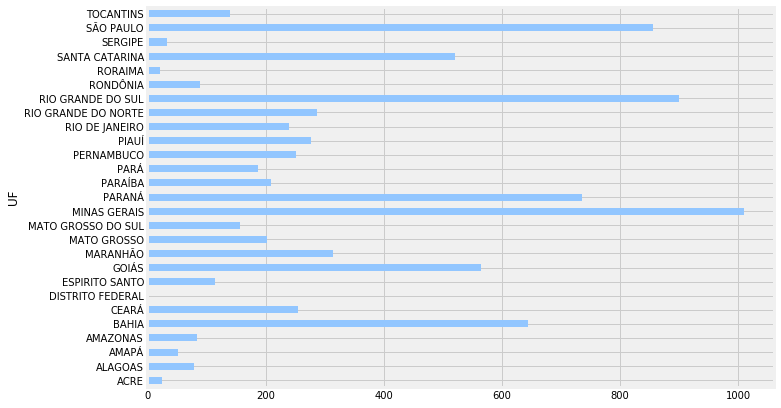

In [22]:
sus.groupby('UF')['razao_leitos_sus_1000_hab'].sum().plot.barh()

In [23]:
br

,date,location,new_cases,new_deaths,total_cases,total_deaths
319,2020-02-27,Brazil,NaN,NaN,1,NaN
320,2020-02-28,Brazil,0.0,NaN,1,NaN
321,2020-02-29,Brazil,0.0,NaN,1,NaN
322,2020-03-01,Brazil,1.0,NaN,2,NaN
323,2020-03-02,Brazil,0.0,NaN,2,NaN
324,2020-03-03,Brazil,0.0,NaN,2,NaN
325,2020-03-04,Brazil,0.0,NaN,2,NaN
326,2020-03-05,Brazil,1.0,NaN,3,NaN
327,2020-03-06,Brazil,4.0,NaN,7,NaN
328,2020-03-07,Brazil,6.0,NaN,13,NaN


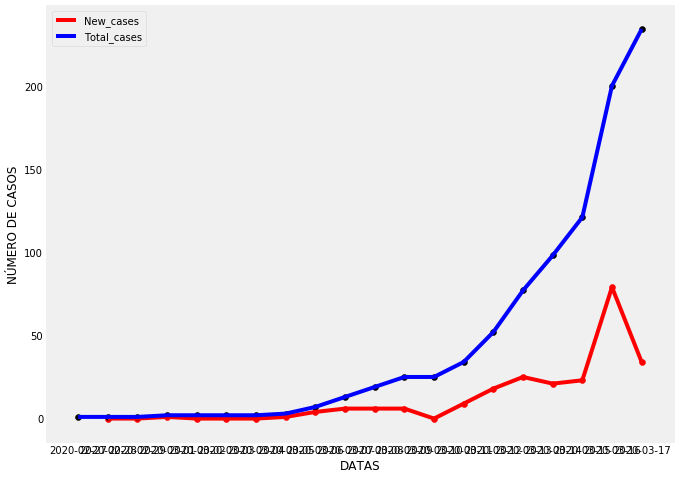

In [24]:
x = br['new_cases']
x2 =  br['total_cases']
y = br['date']
y2 = br['date']
plt.figure(figsize=(10, 8))
plt.plot(y,x, label='New_cases', color='red');
plt.plot(y2,x2, label='Total_cases', color='blue');
plt.scatter(y, x, color='red')
plt.scatter(y2, x2, color='black')
plt.xlabel("DATAS")
plt.ylabel("NÚMERO DE CASOS")
plt.legend(loc='best')
plt.grid()
plt.show()

# ARIMA Model

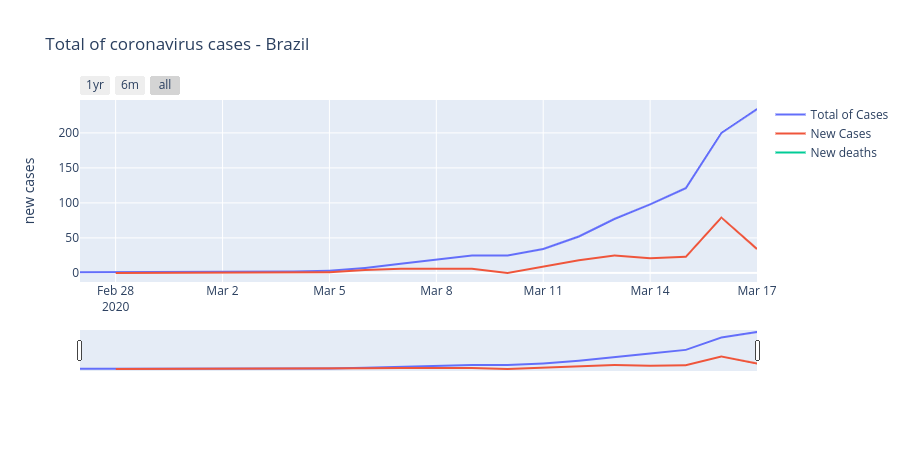

In [25]:
trace = [go.Scatter(x = br['date'], y = br['total_cases'], name='Total of Cases')]
trace += [go.Scatter(x = br['date'], y = br['new_cases'], name='New Cases')]
trace += [go.Scatter(x = br['date'], y = br['new_deaths'], name='New deaths')]

layout = dict(
    title='Total of coronavirus cases - Brazil',
    yaxis=dict(
    title='new cases'
    ),
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=12,
                     label='1yr',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)
fig = dict(data=trace, layout=layout)
py.offline.iplot(fig)

In [26]:
br

,date,location,new_cases,new_deaths,total_cases,total_deaths
319,2020-02-27,Brazil,NaN,NaN,1,NaN
320,2020-02-28,Brazil,0.0,NaN,1,NaN
321,2020-02-29,Brazil,0.0,NaN,1,NaN
322,2020-03-01,Brazil,1.0,NaN,2,NaN
323,2020-03-02,Brazil,0.0,NaN,2,NaN
324,2020-03-03,Brazil,0.0,NaN,2,NaN
325,2020-03-04,Brazil,0.0,NaN,2,NaN
326,2020-03-05,Brazil,1.0,NaN,3,NaN
327,2020-03-06,Brazil,4.0,NaN,7,NaN
328,2020-03-07,Brazil,6.0,NaN,13,NaN


In [27]:
br2 = br[['date', 'total_cases']]

In [28]:
br2.index = pd.to_datetime(br.date, format='%Y-%m-%d')
br2.drop(columns='date', inplace=True)

In [29]:
br2.head(2)

,total_cases
date,
2020-02-27,1
2020-02-28,1


#### Since P-value is greater than the significance level, let’s difference the series and see how the autocorrelation plot looks like.

- If p-value> 0.05: Series is not stationary and must be manipulated.
- If p-value <= 0.05: Series is stationary and the prediction can be made.

In [30]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(br2.total_cases.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.627121
p-value: 0.005263


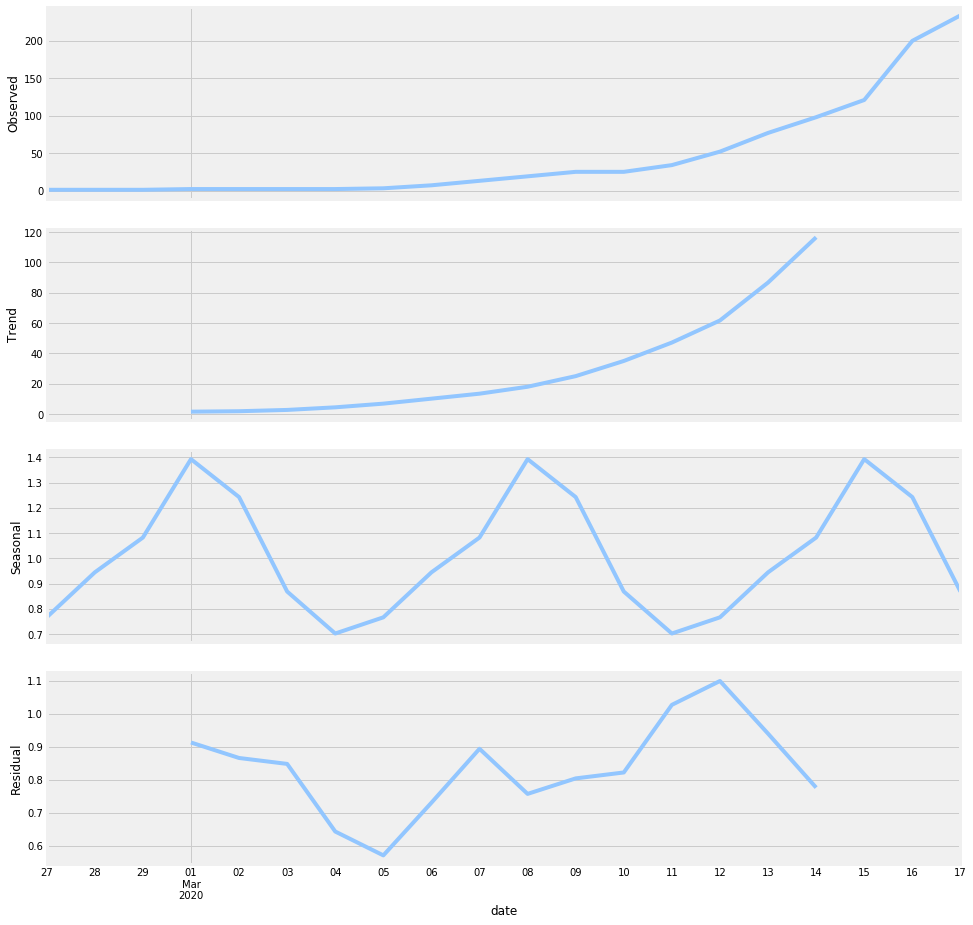

In [31]:
# TRANSFORMANDO SÉRIE TEMPORAL
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(br2, model='multiplicative')
g = result.plot()
g.set_figwidth(14)
g.set_figheight(14)

In [32]:
# pip install chart-studio

### A series of time series analyzes, including the ARIMA model, is a time series, whether stationary or, without the possibility of a trend.

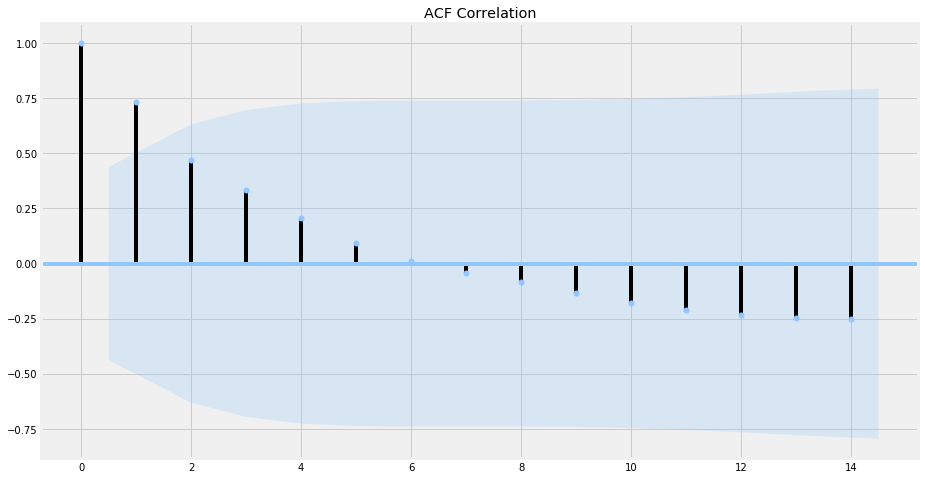

In [33]:
# IMPORTANDO BIBLIOTECAS

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# PLOT DE CORRELAÇÃO ACF

g = plot_acf(br2, title="ACF Correlation")
g.set_figheight(8)
g.set_figwidth(14)

### Analyzing the ACF correlation plot, we find that its value decreases slowly and steadily, this characteristic is typical of a non-stationary time series. 

#### To transform the non-stationary time series into a stationary one, just differentiate it n orders, until the result is a stationary time series.

### The resulting time series after order 1 differentiation is a stationary time series, so we find the first parameter of the ARIMA model, the parameter d = 1.

In addition to informing the seasonality of a time series, the ACF correlation plot can also indicate the best values for the q parameter of the ARIMA model.

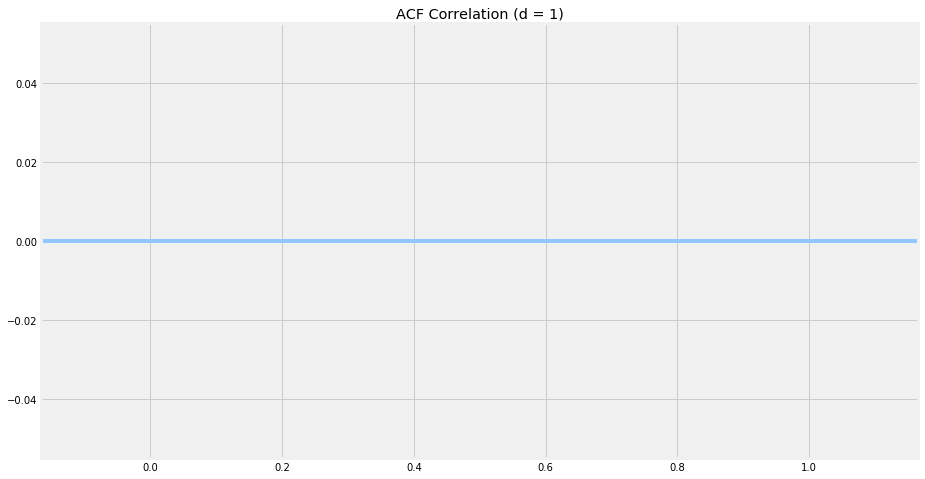

In [36]:
# PLOT CORRELAÇÃO ACF

br_diff = br2.diff(periods=1)

g = plot_acf(br_diff, title="ACF Correlation (d = 1)")
g.set_figheight(8)
g.set_figwidth(14)

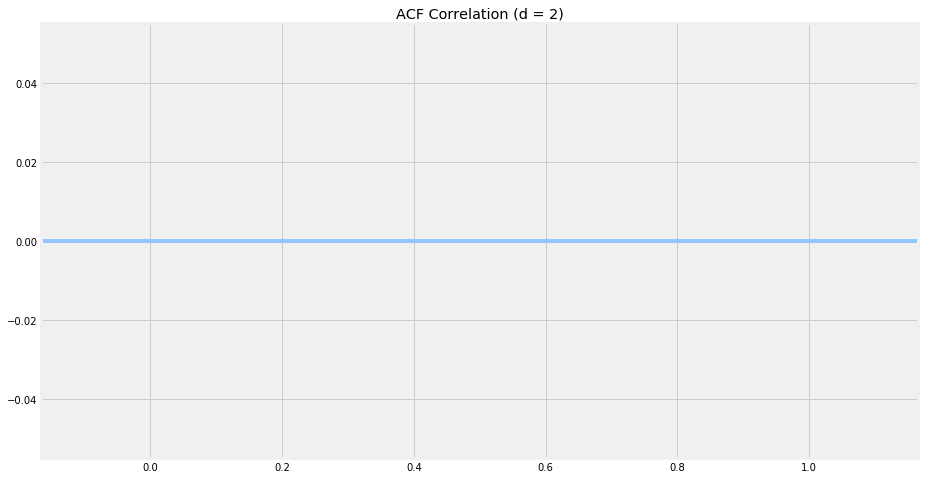

In [84]:
# PLOT CORRELAÇÃO ACF

br_diff2 = br2.diff().diff()

g = plot_acf(br_diff2, title="ACF Correlation (d = 2)")
g.set_figheight(8)
g.set_figwidth(14)

In [39]:
result = adfuller(br_diff.total_cases.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 52.781186
p-value: 1.000000


# the serie already is stationary, it's not necessary to apply diferentiation 

In [88]:
# DEFINE COMBINAÇÕES ENTRE p DE 0 A 3, d = 2, e q = 13
pdq = [(p, 2, 1) for p in range(0, 4)]

# DEFINE P e Q ENTRE 0 e 3
P = Q = range(0, 4)

# DEFINE COMBINAÇÕES ENTRE P, D e Q
seasonal_pdq = [(x[0], 1, x[1], 12) for x in list(itertools.product(P, Q))]

# CALCULANDO O MELHOR PARÂMETRO PARA O MODELO

scores = {}

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(br2,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            scores[param, param_seasonal] = results.aic
            
        except:
            continue
            
print("Melhoers parâmetros: ", min(scores, key=scores.get)," AUC: ", min(scores.values()))

# CRIANDO MODELO COM OS MELHOERS PARÂMETROS

Melhoers parâmetros:  ((0, 2, 1), (0, 1, 0, 12))  AUC:  42.492779480199914


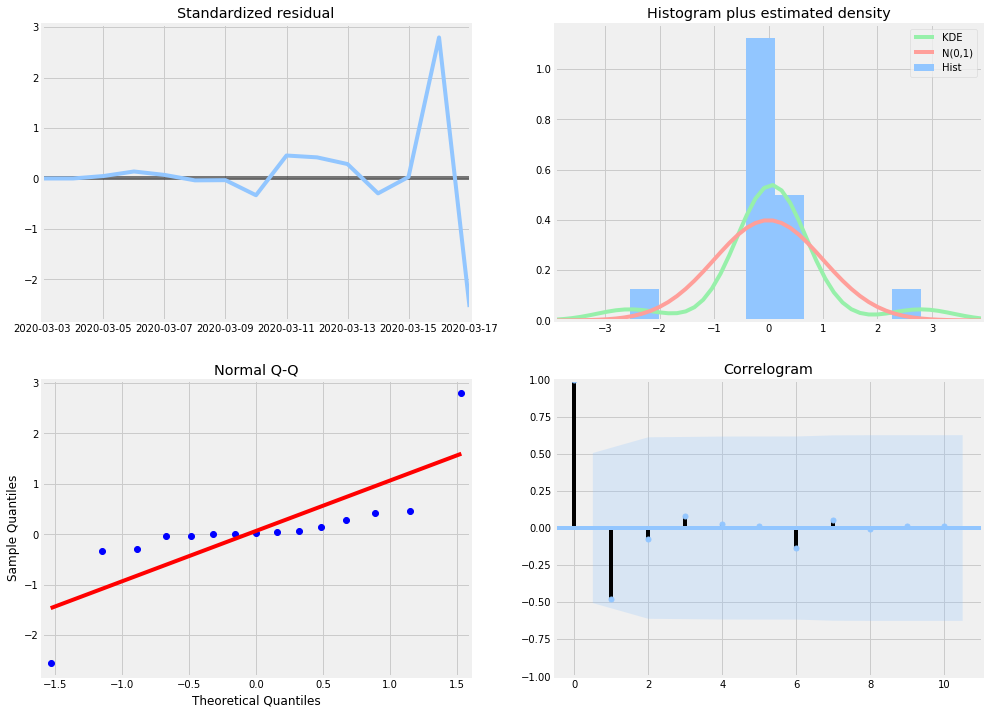

In [91]:
# CRIANDO MODELO COM OS MELHOERS PARÂMETROS 

mod = sm.tsa.statespace.SARIMAX(br2,
                                order=(0, 2, 1),
                                seasonal_order=(0, 1, 0, 1),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

# RESUMO DO MODELO

results.plot_diagnostics(figsize=(15, 12))
plt.show()

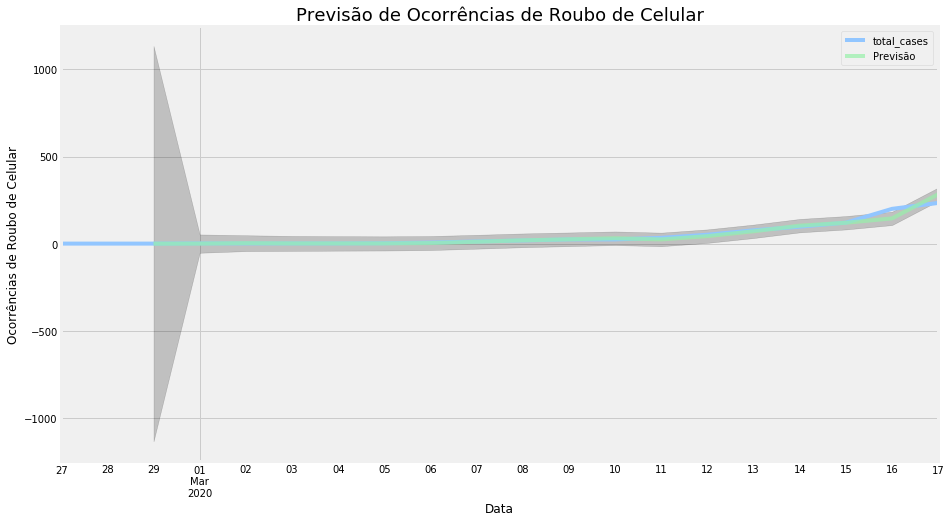

O Mean Squared Error da previsão foi 318


In [92]:
# VALIDAÇÃO DO MODELO: PREVENDO OCORRÊNCIAS A PARTIR DE 2017

pred = results.get_prediction(start=pd.to_datetime('2020-02-29'), dynamic=False)
pred_ci = pred.conf_int()

ax = br2.plot(figsize=(14, 8))
pred.predicted_mean.plot(ax=ax, label='Previsão', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_title("Train to predite growing curve", fontsize=18)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Cases')
plt.legend()

plt.show()

# CALCULANDO MSE

y_forecasted = pred.predicted_mean
y_truth = br2["2020-02-29":].squeeze()

mse = ((y_forecasted - y_truth) ** 2).mean()

print('Mean Squared Error {}'.format(round(mse)))

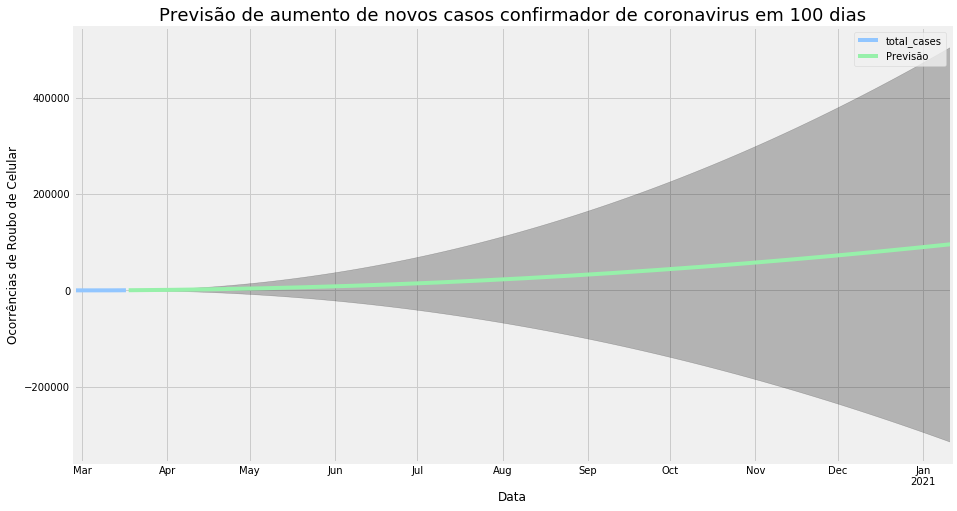

In [138]:
# PREVENDO OCORRÊNCIAS PARA OS PRÓXIMOS TRÊS ANOS

pred_uc = results.get_forecast(steps=300)
pred_ci = pred_uc.conf_int()

ax = br2.plot(figsize=(14, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Previsão')
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_title("Previsão de aumento de novos casos confirmador de coronavirus em 100 dias", fontsize=18)
ax.set_xlabel('Data')
ax.set_ylabel('Ocorrências de Roubo de Celular')

plt.legend()
plt.show()

In [145]:
xp = pred_uc.predicted_mean.index.tolist()
ylimit = []
for dt in br['date']:
    ylimit.append(33000)
for dt in xp:
    ylimit.append(33000)
yp = pred_uc.predicted_mean

In [140]:
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.25)

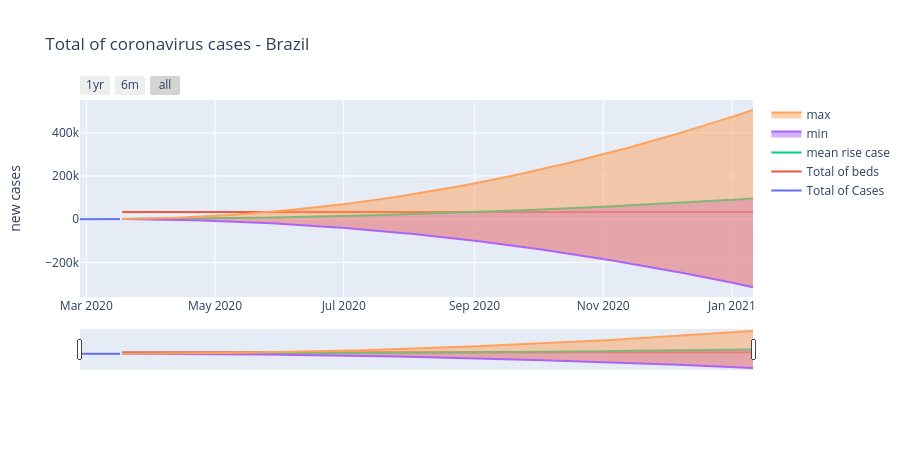

In [152]:
trace = [go.Scatter(x = br['date'], y = br['total_cases'], name='Total of Cases')]
trace += [go.Scatter(x = xp,y = ylimit, name='Total of beds')]
trace += [go.Scatter(x = xp,y = yp, name='mean rise case')]
trace += [go.Scatter(x = pred_ci.index,y = pred_ci.iloc[:, 0], fill='tonexty', name='min')]
trace += [go.Scatter(x = pred_ci.index,y = pred_ci.iloc[:, 1], fill='tonexty', name='max')]

layout = dict(
    title='Total of coronavirus cases - Brazil',
    yaxis=dict(
    title='new cases'
    ),
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=12,
                     label='1yr',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)
fig = dict(data=trace, layout=layout)
py.offline.iplot(fig)

## 2 April will have 1000 case